### Prerequisites

In [1]:
import os
import pandas as pd
import seaborn as sns
import numpy as np
from tqdm import tqdm
from pathlib import Path
from dotenv import load_dotenv
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

load_dotenv()

True

### Data Loading

In [2]:
data_dir = Path(os.environ['dataset_dir'])
df = pd.read_csv(data_dir / 'train.csv')
df = df.set_index('row_id')

# Some feature correlation

In [3]:
sample = df.sample(100000)

### Correlation with time
Not really

In [4]:
sample.corrwith(sample.time_id).sort_values()

f_272     -0.432824
f_200     -0.404056
f_170     -0.189072
f_182     -0.174406
f_266     -0.013526
             ...   
f_83       0.010227
f_110      0.010960
f_124      0.027582
f_175      0.295096
time_id    1.000000
Length: 303, dtype: float64

Text(0, 0.5, 'Target')

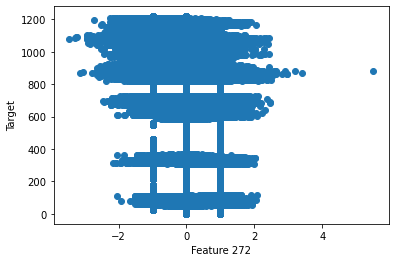

In [5]:
plt.scatter(sample.f_272, sample.time_id)
plt.xlabel("Feature 272")
plt.ylabel("Target")

<AxesSubplot:>

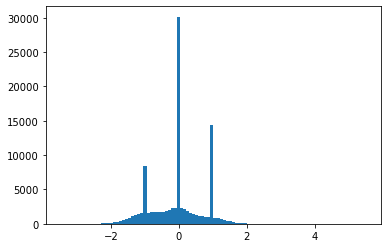

In [6]:
sample.f_272.hist(bins=100, grid=False)

### Correlation with investment ID
No correlation, what is quite predictable

In [7]:
sample.corrwith(sample.investment_id).sort_values()

f_206           -0.013826
f_169           -0.013811
f_142           -0.013525
f_17            -0.012066
f_205           -0.011897
                   ...   
f_64             0.015981
f_146            0.018154
f_212            0.019125
f_106            0.021323
investment_id    1.000000
Length: 303, dtype: float64

### Correlation with target
No correlation, what is suspicious

In [8]:
sample.corrwith(sample.target).sort_values()

f_231    -0.070905
f_250    -0.057165
f_280    -0.053125
f_265    -0.051688
f_71     -0.048465
            ...   
f_76      0.045569
f_93      0.046643
f_270     0.049298
f_119     0.052723
target    1.000000
Length: 303, dtype: float64

### Features correlation

In [9]:
corr = sample.loc[:, 'f_0':].corr()

<AxesSubplot:>

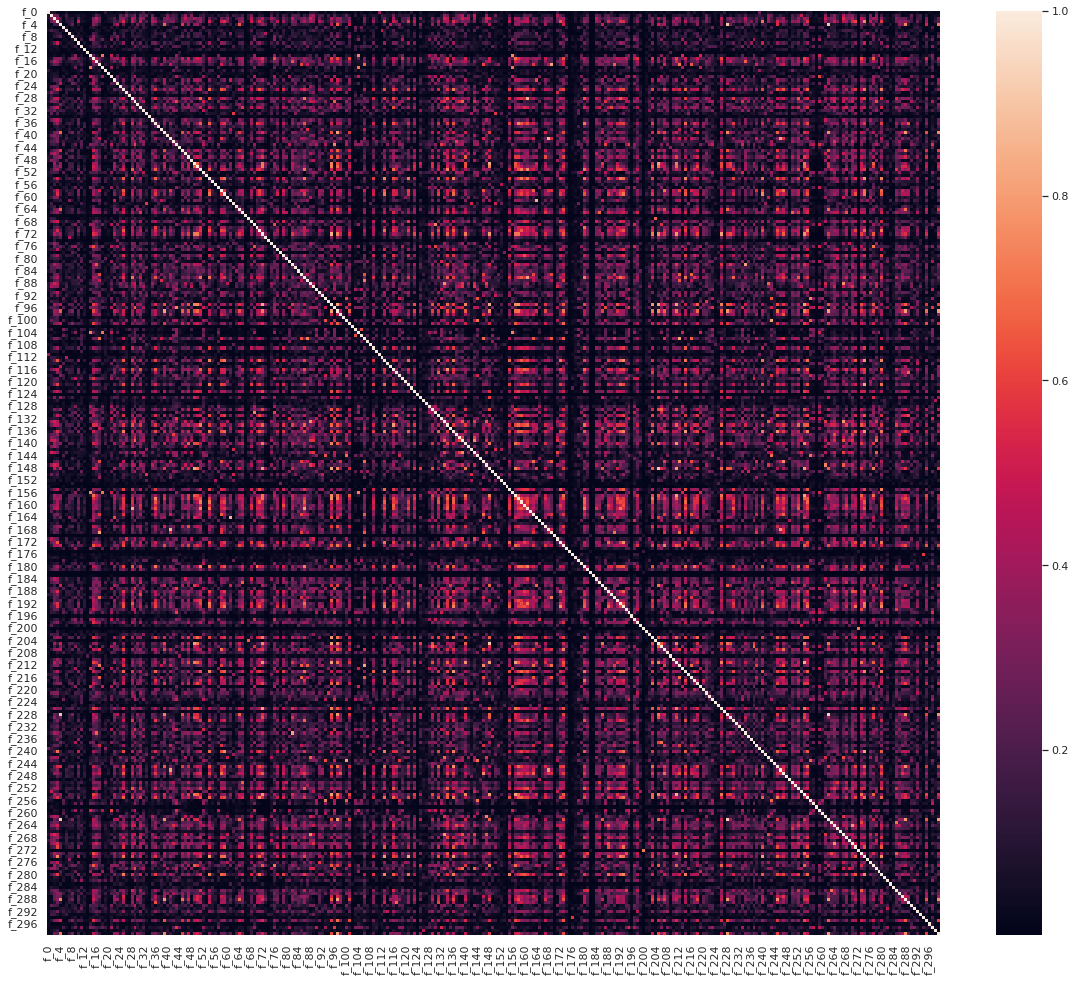

In [10]:
sns.set(rc={"figure.figsize":(20, 17)}) 
sns.heatmap(np.abs(corr))

In [11]:
corr_triu = np.triu(corr.values, k=1) # upper triangular, without diagonal

In [12]:
corr_values = corr_triu.flatten()[corr_triu.flatten() > 0]

This is like pairwise correlation histogram; nothing specific in there

<AxesSubplot:ylabel='Count'>

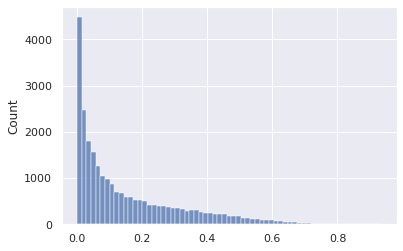

In [13]:
sns.set(rc={"figure.figsize":(6, 4)}) 
sns.histplot(corr_values)